In [1]:
import pandas as pd

splits = ["train", "test", "valid"]
BASE = "Data_non-process/Acne.v18-acne-new.multiclass"

dfs = {}
counts = {}

for split in splits:
    df = pd.read_csv(f"{BASE}/{split}/_classes.csv")
    label_cols = df.columns.drop("filename")
    df["num_labels"] = df[label_cols].sum(axis=1)

    dfs[split] = df
    counts[split] = {
        "total": len(df),
        "single": (df["num_labels"] == 1).sum(),
        "multi":  (df["num_labels"] >= 2).sum()
    }

total_images = sum(counts[s]["total"] for s in splits)
total_single = sum(counts[s]["single"] for s in splits)
total_multi  = sum(counts[s]["multi"]  for s in splits)


print(
    f"Tổng số ảnh        : "
    f"{counts['train']['total']} (train) + "
    f"{counts['test']['total']} (test) + "
    f"{counts['valid']['total']} (valid) = {total_images}"
)

print(
    f"Ảnh 1 nhãn         : "
    f"{counts['train']['single']} (train) + "
    f"{counts['test']['single']} (test) + "
    f"{counts['valid']['single']} (valid) = {total_single}"
)

print(
    f"Ảnh đa nhãn        : "
    f"{counts['train']['multi']} (train) + "
    f"{counts['test']['multi']} (test) + "
    f"{counts['valid']['multi']} (valid) = {total_multi}"
)

print("\n THỐNG KÊ ẢNH 1 NHÃN THEO TỪNG LOẠI")

label_totals = {label: 0 for label in label_cols}

for split in splits:
    df = dfs[split]
    single_df = df[df["num_labels"] == 1]

    for label in label_cols:
        label_totals[label] += (single_df[label] == 1).sum()

for label, count in label_totals.items():
    print(f"- {label:12}: {count} ảnh")


Tổng số ảnh        : 1308 (train) + 92 (test) + 197 (valid) = 1597
Ảnh 1 nhãn         : 426 (train) + 33 (test) + 77 (valid) = 536
Ảnh đa nhãn        : 882 (train) + 59 (test) + 117 (valid) = 1058

 THỐNG KÊ ẢNH 1 NHÃN THEO TỪNG LOẠI
- blackheads  : 30 ảnh
- dark spot   : 232 ảnh
- nodules     : 23 ảnh
- papules     : 150 ảnh
- pustules    : 51 ảnh
- whiteheads  : 50 ảnh


In [ ]:
import os
import shutil
import pandas as pd

LABEL_TO_DIR = {
    "blackheads": "dauden",
    "whiteheads": "dautrang",
    "dark spot": "seo",
    "nodules": "mun",
    "papules": "mun",
    "pustules": "mun"
}

splits = ["train", "valid", "test"]

BASE_SRC = "Data_non-process/Acne.v18-acne-new.multiclass"
BASE_DST = "dataprocessed"

for folder in set(LABEL_TO_DIR.values()):
    os.makedirs(os.path.join(BASE_DST, folder), exist_ok=True)

for split in splits:
    csv_path = f"{BASE_SRC}/{split}/_classes.csv"
    img_dir  = f"{BASE_SRC}/{split}"

    df = pd.read_csv(csv_path)

    label_cols = df.columns.drop("filename")

    # Tính số nhãn
    df["num_labels"] = df[label_cols].sum(axis=1)

    # Chỉ lấy ảnh 1 nhãn
    single_df = df[df["num_labels"] == 1]

    moved_count = 0

    for _, row in single_df.iterrows():
        filename = row["filename"]

        # Xác định nhãn của ảnh
        label = row[label_cols][row[label_cols] == 1].index[0]

        # Xác định thư mục đích
        target_subdir = LABEL_TO_DIR[label]
        dst_path = os.path.join(BASE_DST, target_subdir, filename)
        src_path = os.path.join(img_dir, filename)

        if os.path.exists(src_path):
            shutil.copy2(src_path, dst_path)
            moved_count += 1
        else:
            print(f"⚠️ Không tìm thấy ảnh: {src_path}")

    print(f"Đã copy {moved_count} ảnh từ tập {split}")


✅ Đã copy 426 ảnh từ tập train
✅ Đã copy 77 ảnh từ tập valid
✅ Đã copy 33 ảnh từ tập test


In [ ]:
import os
from collections import defaultdict

BASE_DIR = "Data_non-process/Acne type classification.v3i.folder"
SPLITS = ["train", "test"]
IMG_EXTS = (".jpg", ".jpeg", ".png", ".bmp", ".webp")

class_counts = defaultdict(int)
grand_total = 0

for split in SPLITS:
    split_path = os.path.join(BASE_DIR, split)

    for cls in os.listdir(split_path):
        cls_path = os.path.join(split_path, cls)
        if os.path.isdir(cls_path):
            count = len([
                f for f in os.listdir(cls_path)
                if f.lower().endswith(IMG_EXTS)
            ])
            class_counts[cls] += count
            grand_total += count

print("THỐNG KÊ DATASET THỨ 2 (train + test)")

for cls, count in sorted(class_counts.items()):
    print(f"- {cls:25}: {count} ảnh")

print(f"\n TỔNG SỐ ẢNH (train + test): {grand_total}")


📊 THỐNG KÊ DATASET THỨ 2 (train + test)
- acne-comedonica          : 374 ảnh
- acne-conglobata          : 199 ảnh
- acne-papulopustulosa     : 181 ảnh

✅ TỔNG SỐ ẢNH (train + test): 754


In [28]:
import os

BASE_DST = "dataprocessed"
CLASSES = ["dauden", "dautrang", "seo", "mun"]
IMG_EXTS = (".jpg", ".jpeg", ".png", ".bmp", ".webp")

print("📦 THỐNG KÊ ẢNH TRONG CÁC FOLDER (SAU XỬ LÝ)")

grand_total = 0
for cls in CLASSES:
    folder = os.path.join(BASE_DST, cls)
    if not os.path.isdir(folder):
        print(f"⚠️ Không thấy folder: {folder}")
        continue

    files = [
        f for f in os.listdir(folder)
        if os.path.isfile(os.path.join(folder, f)) and f.lower().endswith(IMG_EXTS)
    ]
    count = len(files)
    grand_total += count
    print(f"- {cls:10}: {count} ảnh")

print(f"\n✅ Tổng cộng: {grand_total} ảnh")


📦 THỐNG KÊ ẢNH TRONG CÁC FOLDER (SAU XỬ LÝ)
- dauden    : 208 ảnh
- dautrang  : 246 ảnh
- seo       : 232 ảnh
- mun       : 604 ảnh

✅ Tổng cộng: 1290 ảnh


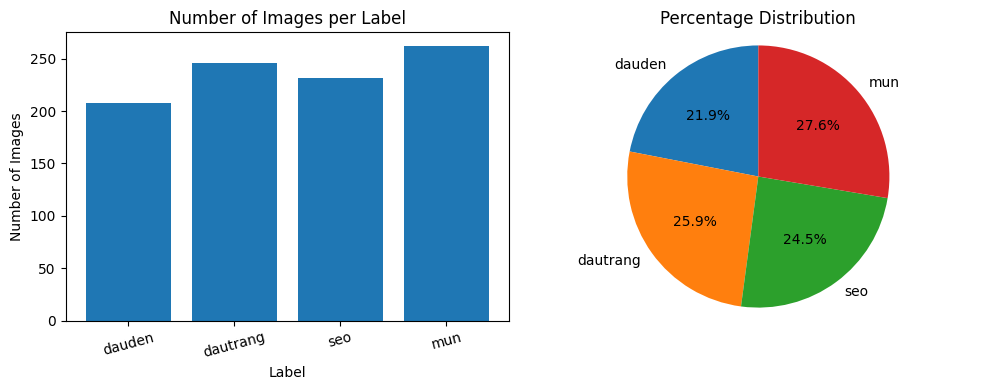

In [6]:
import os
import matplotlib.pyplot as plt

BASE_DST = "dataprocessed"
CLASSES = ["dauden", "dautrang", "seo", "mun"]
IMG_EXTS = (".jpg", ".jpeg", ".png", ".bmp", ".webp")

# Thu thập dữ liệu
labels = []
counts = []

for cls in CLASSES:
    folder = os.path.join(BASE_DST, cls)
    if os.path.isdir(folder):
        count = len([
            f for f in os.listdir(folder)
            if f.lower().endswith(IMG_EXTS)
        ])
        labels.append(cls)
        counts.append(count)

total = sum(counts)
percentages = [c / total * 100 for c in counts]

# Màu cho từng nhãn
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red"]

# ===== VẼ CHUNG 1 FIGURE =====
plt.figure(figsize=(10, 4))

# --- Bar chart ---
plt.subplot(1, 2, 1)
plt.bar(labels, counts)
plt.title("Number of Images per Label")
plt.xlabel("Label")
plt.ylabel("Number of Images")
plt.xticks(rotation=15)

# --- Pie chart ---
plt.subplot(1, 2, 2)
plt.pie(
    percentages,
    labels=labels,
    autopct="%.1f%%",
    startangle=90
)
plt.title("Percentage Distribution")
plt.axis("equal")

plt.tight_layout()
plt.show()



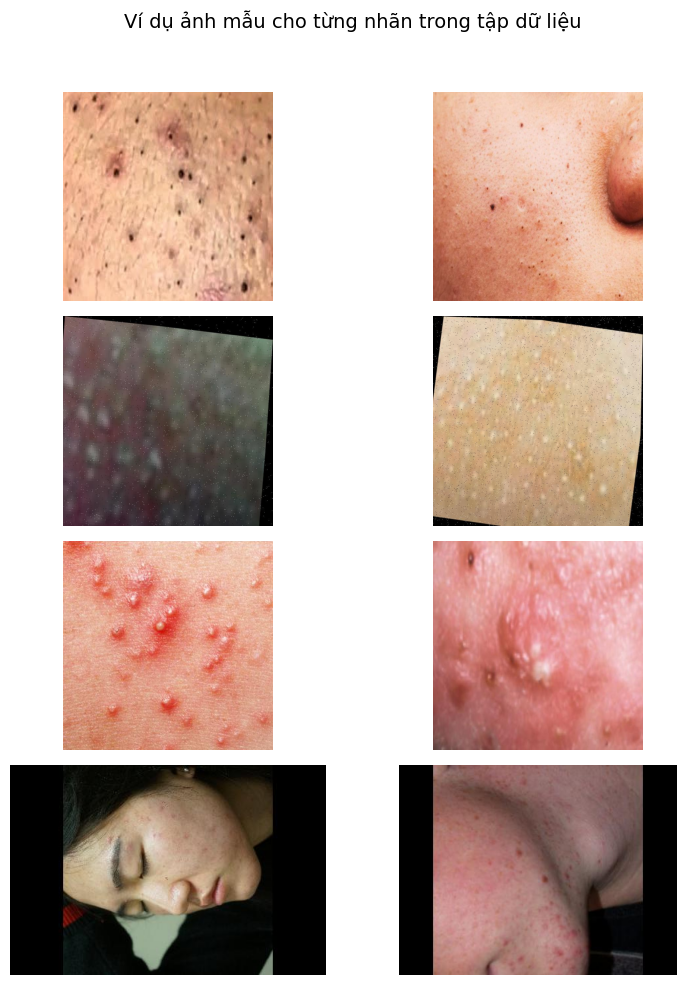

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

DATASET_DIR = "dataprocessed"   
NUM_IMAGES_PER_CLASS = 2

classes = sorted([
    d for d in os.listdir(DATASET_DIR)
    if os.path.isdir(os.path.join(DATASET_DIR, d))
])

fig, axes = plt.subplots(
    nrows=len(classes),
    ncols=NUM_IMAGES_PER_CLASS,
    figsize=(8, 2.5 * len(classes))
)

if len(classes) == 1:
    axes = [axes]

for row_idx, cls in enumerate(classes):
    cls_path = os.path.join(DATASET_DIR, cls)
    
    images = [
        f for f in os.listdir(cls_path)
        if f.lower().endswith(('.png', '.jpg', '.jpeg'))
    ]
    
    sampled_images = random.sample(images, min(NUM_IMAGES_PER_CLASS, len(images)))
    
    for col_idx, img_name in enumerate(sampled_images):
        img_path = os.path.join(cls_path, img_name)
        img = Image.open(img_path).convert("RGB")
        
        axes[row_idx][col_idx].imshow(img)
        axes[row_idx][col_idx].axis("off")

    # đặt tên nhãn chung cho cả hàng (ở giữa 2 ảnh)
    axes[row_idx][0].set_ylabel(
        cls,
        fontsize=12,
        rotation=0,
        labelpad=40,
        va="center"
    )

plt.suptitle("Ví dụ ảnh mẫu cho từng nhãn trong tập dữ liệu", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
